In [495]:
%reload_ext blackcellmagic
import pandas as pd
import numpy as np
import os
import pprint as pp
import matplotlib.pyplot as plt

## Time Scale Comparison

This file will explore how the gradual adoption of internet usage, through fixed and mobile subscriptions relates to other factors in countries. We explored a lot of different variables for corelation with broadband subscriptions. We hypothesized that internet adoption would affects factors dealing with education and the economy.W

In [496]:
# this function will return a dataframe where only the specified variable will be available
# the datasets are set up where all countries are displayed with one variable then another dataframe with a different variable was concatenated below it
colors = [
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
    "b",
    "g",
    "y",
    "k",
    "b",
    "g",
    "r",
    "c",
    "m",
    "r",
    "c",
    "m",
    "y",
    "k",
    "b",
    "m",
    "y",
    "k",
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
]

def get_var(df, var):
    if "VAR" in df.columns:
        return df[df["VAR"] == var].fillna(value=0)
    elif 'ï»¿"MSTI_VAR"' in df.columns:
        return df[df['ï»¿"MSTI_VAR"'] == var].fillna(value=0)
    elif 'VARIABLE' in df.columns:
        return df[df['VARIABLE'] == var].fillna(0)


## this funtion returns a dataframe where the countries are the index and the years are the columns and values are allocated appropiately


def get_values(df):
    countries = list(df.Country.unique())
    data = {}
    if "Time" in df.columns:
        years = list(df.Time.unique())
        for y in years:
            data[str(y)] = {}
            for c in countries:
                value = df.loc[(df["Country"] == c) & (df["Time"] == y)].Value.values
                if value.shape == (1,):
                    data[str(y)][c] = float(value)
                else:
                    data[str(y)][c] = np.nan

    elif "Year" in list(df.columns):
        years = list(df.Year.unique())
        for y in years:
            data[str(y)] = {}
            for c in countries:
                value = df.loc[(df["Country"] == c) & (df["Year"] == y)].Value.values
                if value.shape == (1,):
                    data[str(y)][c] = float(value)
                else:
                    data[str(y)][c] = np.nan

    return pd.DataFrame(data)

In [497]:
def plotthese(dataframes, choice, label):

    cc = 0
    fig, axs = plt.subplots(2, len(dataframes) + 1, figsize=(40, 10), sharex=True)

    head = choice.sort_values("2018", ascending=False).head()
    lab_head = list(choice.sort_values("2018", ascending=False).head().index)

    tail = choice.sort_values("2018", ascending=False).tail()
    lab_tail = list(choice.sort_values("2018", ascending=False).tail().index)

    for c in list(head.index):
        try:
            axs[0, 0].plot(
                sorted(choice.columns), choice.loc[c], color=colors[cc], label=c
            )
        except:
            pass

        ind = 0
        df_count = 1
        for df in dataframes:
            try:
                axs[0, df_count].plot(
                    sorted(df.columns), df.loc[c], color=colors[cc], label=c
                )
                axs[0, df_count].set_title(str(titles[ind]), fontsize=18)
            except:
                pass
            df_count += 1
            ind += 1
        cc += 1

    for c in list(tail.index):
        try:
            axs[1, 0].plot(
                sorted(choice.columns), choice.loc[c], color=colors[cc + 5], label=c
            )
        except:
            pass
        ind = 0
        df_count = 1
        for df in dataframes:
            try:
                axs[1, df_count].plot(
                    sorted(df.columns), df.loc[c], color=colors[cc + 5], label=c
                )
            except:
                pass
            ind += 0
            df_count += 1
        cc += 1

    axs[0, 0].legend()
    axs[0, 0].set_title("top 5", fontsize=20)
    axs[1, 0].legend()
    axs[1, 0].set_title("bottom 5", fontsize=20)

    plt.suptitle(label, fontsize=25)

    plt.show()


##mobile subscriptions rise at a faster rate that fixed subscriptions
##### visualized better in per100 unit

In [508]:
def plot2(dataframes, choice, label):
    ind = 0
    for df in dataframes:
        cc = 0
        fig, axs = plt.subplots(1, 4, figsize=(20, 8))

        head = choice.sort_values("2018", ascending=False).head()
        lab_head = list(choice.sort_values("2018", ascending=False).head().index)

        tail = choice.sort_values("2018", ascending=False).tail()
        lab_tail = list(choice.sort_values("2018", ascending=False).tail().index)
        
        for c in list(head.index):
            try:
                idk = axs[0].plot(sorted(choice.columns), choice.loc[c], color=colors[cc], label=c)
            except:
                pass
            try:
                idk3 = axs[1].plot(sorted(df.columns), df.loc[c], color=colors[cc], label=c)
            except:
                pass
            axs[0].legend()
            axs[0].set_title('top 5')
            axs[1].legend()
            cc += 1

        for c in list(tail.index):
            try:
                idk2 = axs[2].plot(sorted(choice.columns), choice.loc[c], color=colors[cc + 5], label=c)
            except:
                pass
            try:
                idk4 = axs[3].plot(sorted(df.columns), df.loc[c], color=colors[cc + 5], label=c)
            except:
                pass

            axs[2].legend()
            axs[2].set_title('bottom 5')
            axs[3].legend()
            cc += 1
            
        plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
        plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)
        plt.setp(axs[2].xaxis.get_majorticklabels(), rotation=45)
        plt.setp(axs[3].xaxis.get_majorticklabels(), rotation=45)
        plt.suptitle(label + ' vs. ' + str(titles[ind]))
        ind += 1

        plt.show()



## F

In [509]:
##this first database has information regarding broadband subscripstion
# i used fixed/mobile subscriptions for units: total and p100 people.
# this can be seen in the code_dict below
path = os.path.join("OECD_data", "broadband.csv")

with open(path) as csv_file:
    og_broadband_df = pd.read_csv(csv_file)
og_bb_df = og_broadband_df[["Country", "VAR", "Time", "Value", "Unit"]]

In [510]:
path = os.path.join("OECD_data", "GERD.csv")

with open(path) as csv_file:
    GERD = pd.read_csv(csv_file)

GERD = GERD[["Country", 'ï»¿"MSTI_VAR"', "MSTI Variables", "Year", "Value"]]

In [511]:
path = os.path.join("OECD_data", "economic_outlook.csv")

with open(path) as csv_file:
    econ_df = pd.read_csv(csv_file)

econ_df = econ_df[["Country", "VARIABLE", "Variable", "Time", "Value"]]

In [512]:
##endpoint dataframes are created by calling the two functions introduced at the beggining

fixed100_bb_df = get_var(og_bb_df, "BB-P100-TOT")
mob100_bb_df = get_var(og_bb_df, "BBW-P100-TOT")
fixed100_df = get_values(fixed100_bb_df[fixed100_bb_df["Time"].str.startswith("2")])
mobile100_df = get_values(mob100_bb_df[mob100_bb_df["Time"].str.startswith("2")])

fixed_bb_df = get_var(og_bb_df, "BB-SUBS-TOT")
mob_bb_df = get_var(og_bb_df, "BBW-SUBS-TOT")
fixed_df = get_values(fixed_bb_df[fixed_bb_df["Time"].str.startswith("2")])
mobile_df = get_values(mob_bb_df[mob_bb_df["Time"].str.startswith("2")])

POP = get_var(econ_df, "POP")
population = get_values(POP)

##fixed+mobile in persons
total_bb_df = pd.DataFrame()
for col in fixed_df.columns:
    total_bb_df[col] = fixed_df[col] + mobile_df[col]
    
total100_df = pd.DataFrame()
for col in total_bb_df.columns:
    total100_df[col] = (total_bb_df[col] / population[col]) * 100

total100_df = total100_df.dropna(axis=0)

In [513]:
##Research and Development
gdpRD = get_var(GERD, "G_XGDP")
gdpRD_df = get_values(gdpRD)

VA_PPP = get_var(GERD, "VA_PPP")
val_addedPPP = get_values(VA_PPP)

##economic_indicators
###check for GDP only not GDP as PPP 
GDP_PPP = get_var(GERD, "GDP_PPP")
gdp_ppp = get_values(GDP_PPP)

UNR = get_var(econ_df, "UNR")
unemployment_rate = get_values(UNR)

GDPV_CAP = get_var(econ_df, "GDPV_CAP")
gdp_percapita = get_values(GDPV_CAP)

GDPVD_CAP = get_var(econ_df, "GDPVD_CAP")
gdp_pcapita_PPP = get_values(GDPVD_CAP)

In [514]:
dataframes = [
    gdpRD_df,
    val_addedPPP,
    unemployment_rate,
    gdp_pcapita_PPP
]
titles = [
    "gdp % spent on R&D sector",
    "value added PPP R&D sector",
    "unemployment rate",
    'gdp_pcapita_PPP'
]

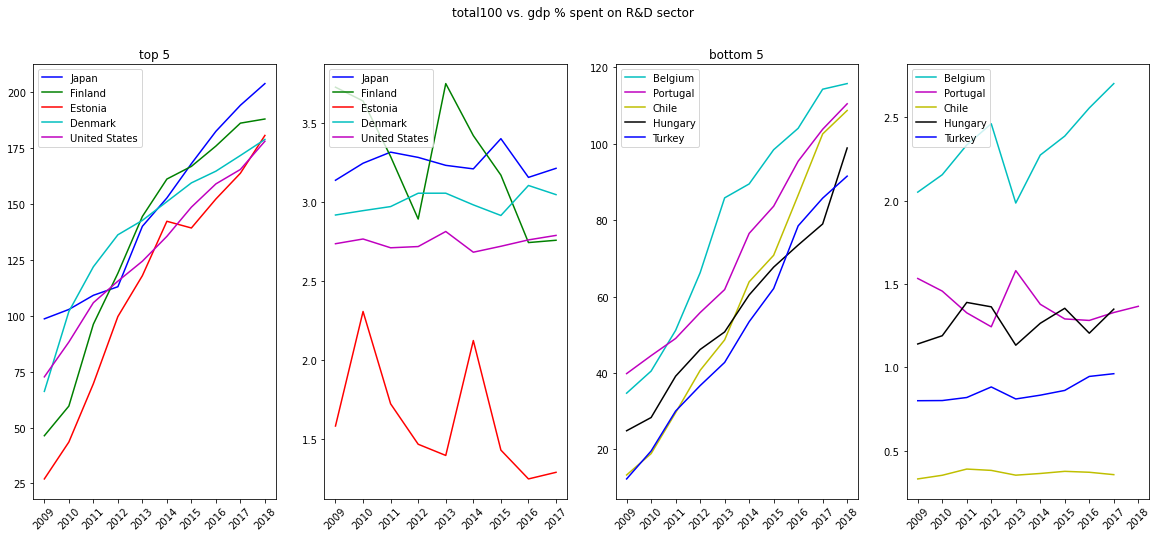

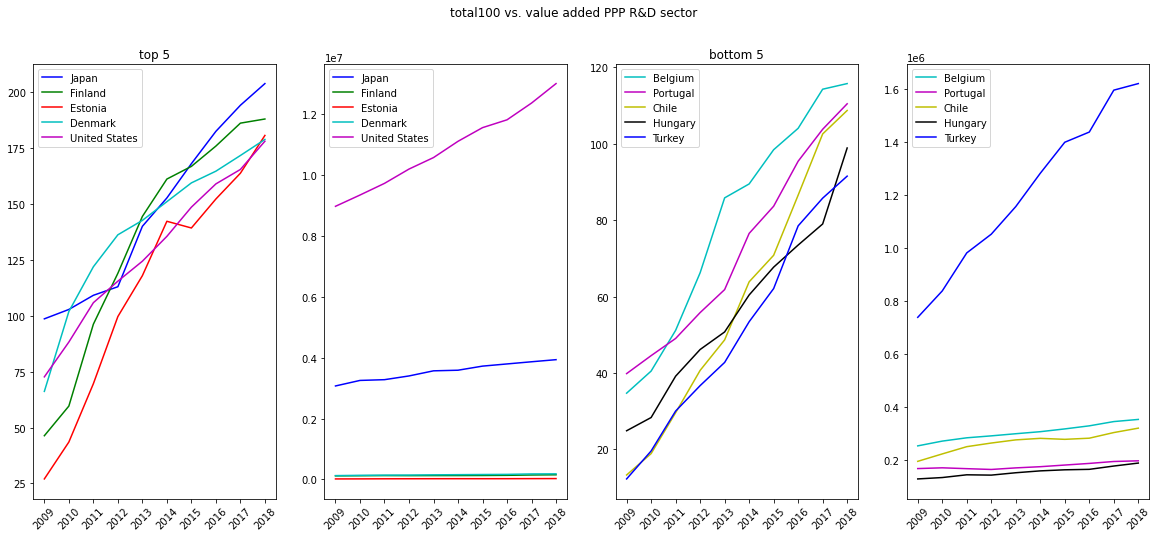

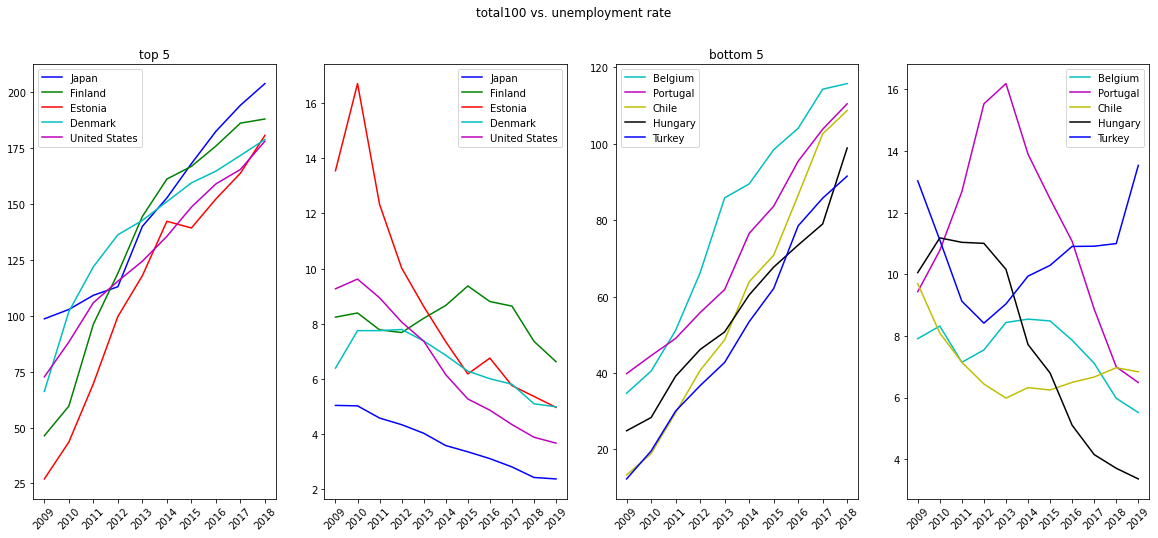

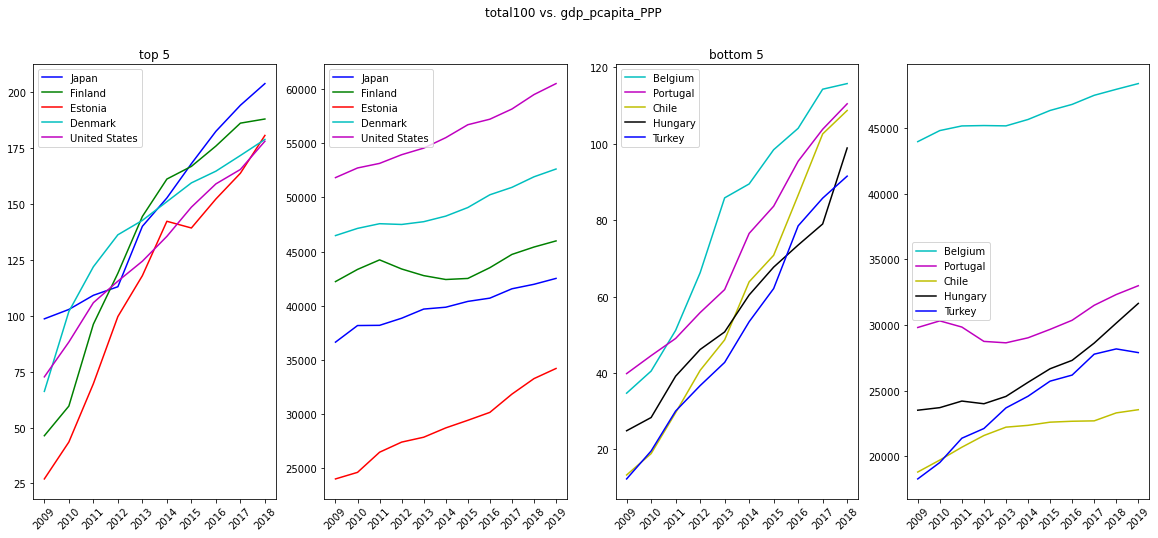

In [515]:
total100plot = plot2(dataframes, total100_df, 'total100')

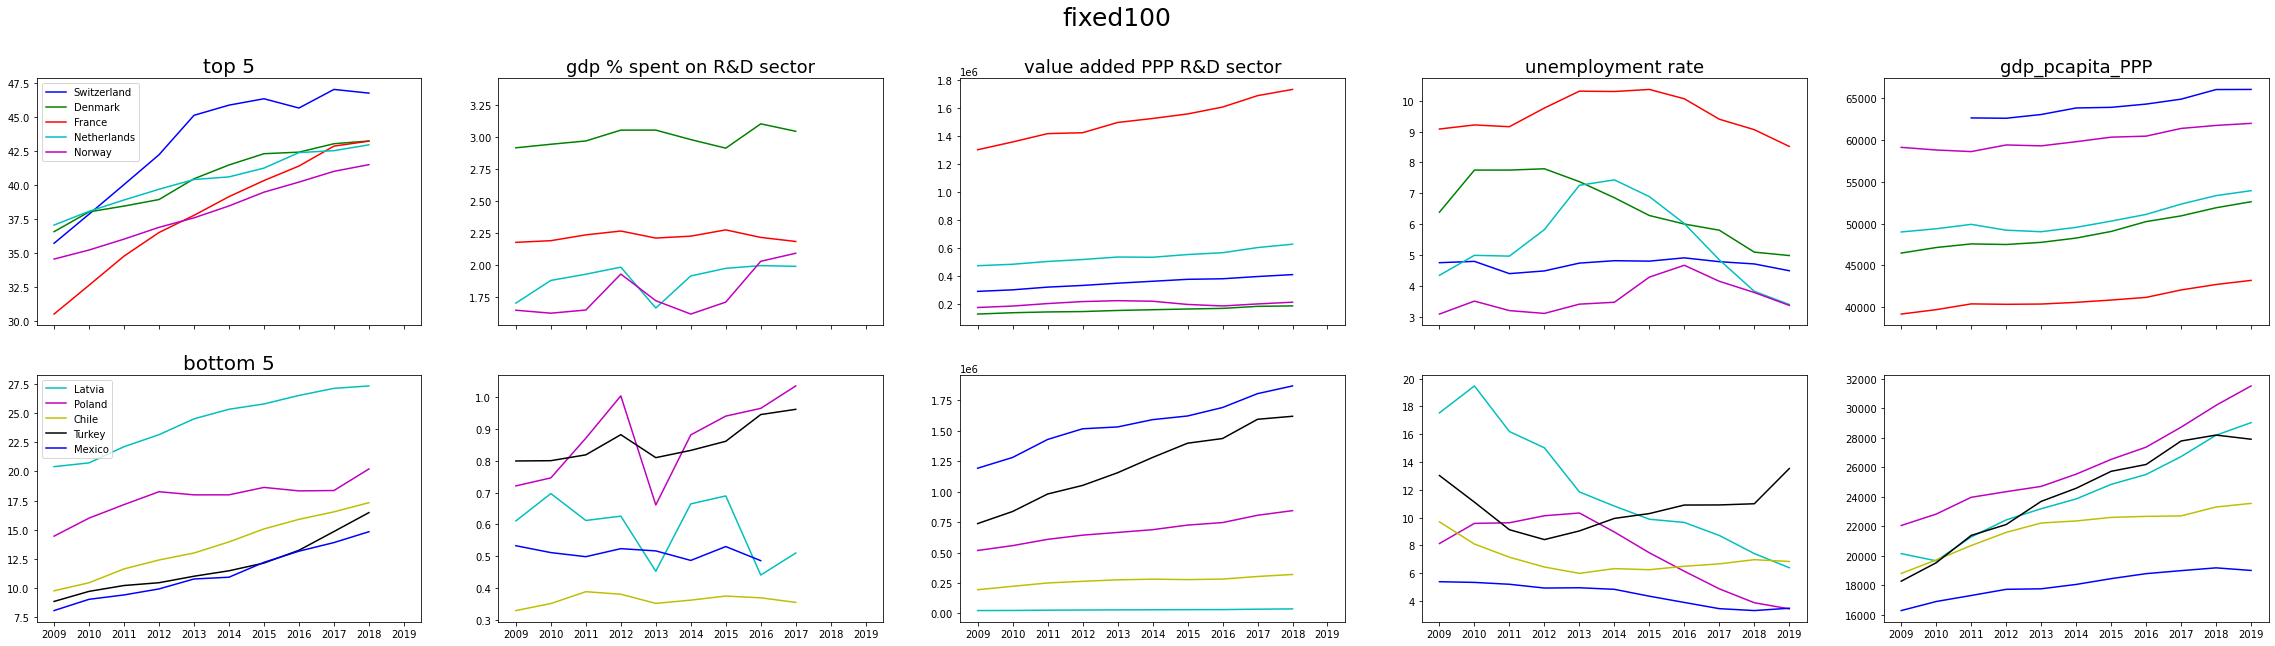

In [516]:
fixed100plot = plotthese(dataframes, fixed100_df, 'fixed100')

In [517]:
## add units to graphs

## pick variables to compare and talk about

##

In [444]:
## to find desired code_dict

# what = zip(list(econ_df['VARIABLE']), list(econ_df['Variable']))
# uni = {}
# for i in what:
#     if i not in uni:
#         uni[i[0]] = i[1]
#     else:
#         pass
# uni

In [ ]:
## make a percentage column where fixed + mobile / total pop is a value
### %connected to mobile